# Tutorial 1: Load and Explore a Dataset
In this tutorial, we will be looking at the dataset from the book "<a href=https://www.ericachenoweth.com/research/wcrw>Why Civil Reistance Works</a>." 

We will start by loading necessary python libraries and the data, which can be found in the linke above. 

## 1. Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
%config InlineBackend.figure_format = 'retina'

## 2. Load data

In [2]:
data = pd.read_stata('data-replication-files/WCRWreplication.dta')
data.head() # Check data loads properly

,defect,outcome,peakmembership,eyear,byear,location,campaign,target,lccode,tccode,...,lmtnest,ef,loclpolity1,loclcap1,loclcap2,loclcap3,loclcap4,mempc,demdum,recur1
0,1.0,5,50000.0,1959,1956,Cuba,Cuban Revolution,Batista regime,40.0,40.0,...,1.694107,0.2134,-9.0,0.0,1.0,0.0,0.0,1.226839,0.0,0.0
1,0.0,3,5000.0,1920,1918,Haiti,Caco Revolt,U.S. occupation,41.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,1.0,5,30000.0,1985,1985,Haiti,,Jean Claude Duvalier,41.0,41.0,...,2.797281,0.0950,-9.0,1.0,0.0,0.0,0.0,1.200712,0.0,0.0
3,0.0,3,650.0,1924,1916,Dominican Republic,Dominican insurgency,U.S. occupation,42.0,2.0,...,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN,0.0,NaN
4,1.0,3,NaN,1965,1965,Dominican Republic,leftists,Loyalist regime,42.0,42.0,...,2.856470,0.3868,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0


In [3]:
# Print the name of the columns
print(data.columns)

Index(['defect', 'outcome', 'peakmembership', 'eyear', 'byear', 'location',
       'campaign', 'target', 'lccode', 'tccode', 'nonviol', 'viol', 'fselfdet',
       'regchange', 'secession', 'other', 'success', 'limited', 'failure',
       'ongoing', 'middleeast', 'americas', 'asia', 'fsu', 'europe', 'africa',
       'lpolity', 'tpolity', 'lgovcap', 'tgovcap', 'regviol', 'violsim',
       'extfor', 'statesup', 'regaid', 'sdirect', 'deltatpolity', 'deltatgdp',
       'lduration', 'lmembers', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8',
       't9', 't10', 't11', 'cw', 'postcw', 'ixnNVmem', 'rgdppc',
       'growthrgdppc', 'lupop', 'recur5', 'recur10', 'polityt10', 'polityt1',
       'polityt5', 'politychanget10', 'politychanget1', 'politychanget5',
       'politychanget0', 'authdum', 'deltatgovcap', 'memdum', 'lnpop',
       'ixnNVpc', 'lpolity1', 'lcinc1', 'lgdppc', 'wars', 'lmtnest', 'ef',
       'loclpolity1', 'loclcap1', 'loclcap2', 'loclcap3', 'loclcap4', 'mempc',
       'demdum',

In [4]:
# Load descriptions for each vriable (column)
var_descriptors = pd.read_csv('data-replication-files/WCRW_variables_descriptions.csv')
var_descriptors.head()

,Variable_Name,Source,Variable_Description
0,CAMPAIGN,Various encyclopedic entries; scholarly works;...,Name of campaign.
1,LOCATION,Various encyclopedic entries; scholarly works;...,Geographic base of campaign (country).
2,LCCODE,Correlates of War,Location country code.
3,BYEAR,Various encyclopedic entries; scholarly works;...,Year in which campaign begins.
4,EYEAR,Various encyclopedic entries; scholarly works;...,Year at which the campaign reaches its peak; i...


In [5]:
# Create dictionary of variable descriptions
dct_descriptors = {}
for i in range(var_descriptors.shape[0]):
    var_name = var_descriptors.Variable_Name[i].lower().strip()
    var_dscp = var_descriptors.Variable_Description[i]
    if var_name == 'ixnnvmem':
        var_name = 'ixnNVmem'
    elif var_name == 'ixnnvpc':
        var_name = 'ixnNVpc'
    dct_descriptors[var_name] = var_dscp
    

## 3. Explore data
In this section, we will start exploring the data so we have an idea of what we are working with. 

In [34]:
# Check the dimensions of the dataset
print('There are {} campaigns in the dataset.'.format(data.shape[0]))

There are 323 campaigns in the dataset.


In [36]:
# Explore outcomes
print('Outcomes are an {}'.format(dct_descriptors['outcome']))

data['limited'].value_counts()

Outcomes are an Ordinal measure with result code. Success=5; Limited Success=4; Failure=3. 


0    270
1     53
Name: limited, dtype: int64

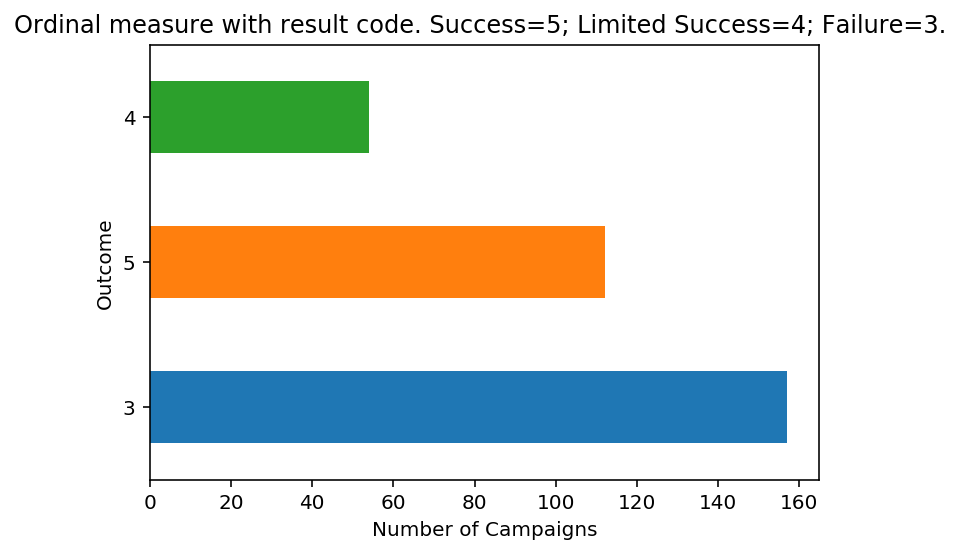

In [37]:
# Make bar plots of outcomes
campaign_outcomes = data['outcome'].value_counts()
campaign_outcomes.plot(kind='barh')
plt.xlabel('Number of Campaigns')
plt.ylabel('Outcome')
plt.title('{}'.format(dct_descriptors['outcome']))
plt.show()

In [9]:
# Explore defect
print('Defect is {}'.format(dct_descriptors['defect']))

Defect is Dichotomous variables identifying whether the target’s security forces defected during the conflict. Does not include routine individual defections, but rather large-scale, systematic breakdowns on the execution of orders from the target regime. 


Text(0.5, 0, 'Defect')

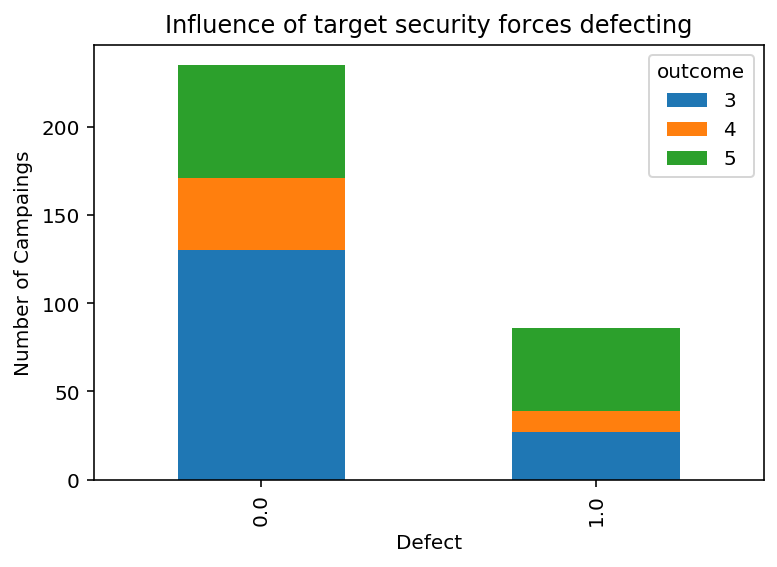

In [32]:
data.groupby(['defect','outcome']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Influence of target security forces defecting')
plt.ylabel('Number of Campaings')
plt.xlabel('Defect')

In [13]:
# Explore defect
print('politychanget10 is {}'.format(dct_descriptors['politychanget10']))

politychanget10 is Change in location POLITY IV score ten years after campaign ends. 


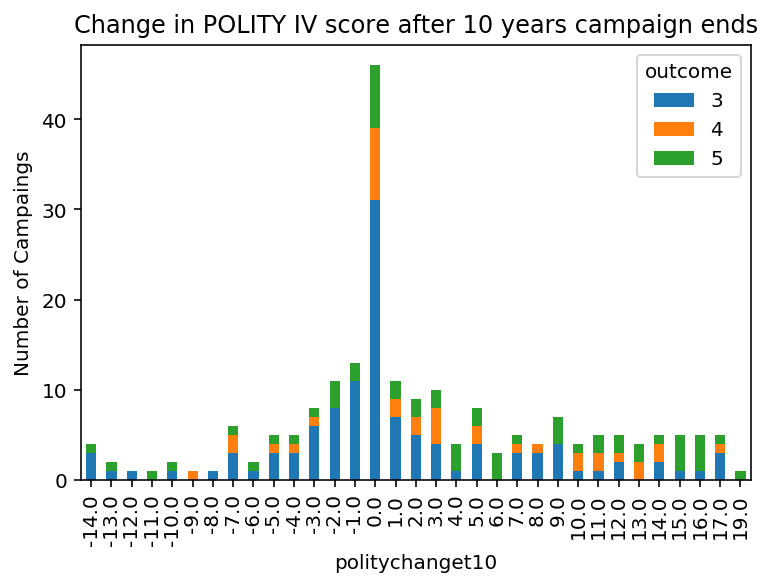

In [17]:
data.groupby(['politychanget10','outcome']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Change in POLITY IV score after 10 years campaign ends')
plt.ylabel('Number of Campaings')
plt.xlabel('politychanget10')
plt.show()

In [21]:
# Explore defect
print('regviol is {}'.format(dct_descriptors['regviol']))

regviol is Dichotomous variable identifying whether the regime used violence to crack down on campaign.


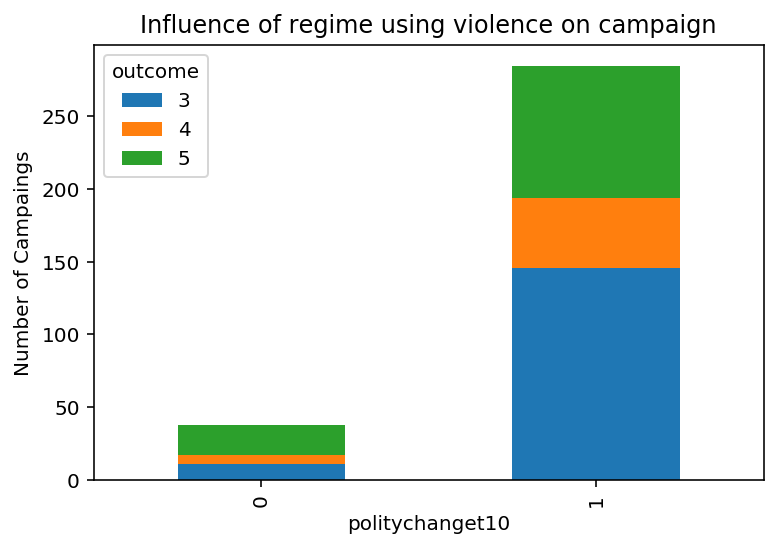

In [22]:
data.groupby(['regviol','outcome']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Influence of regime using violence on campaign')
plt.ylabel('Number of Campaings')
plt.xlabel('politychanget10')
plt.show()

In [26]:
# Explore defect
var_name = 'nonviol'
print('{} is {}'.format(var_name, dct_descriptors['regviol']))

nonviol is Dichotomous variable identifying whether the regime used violence to crack down on campaign.


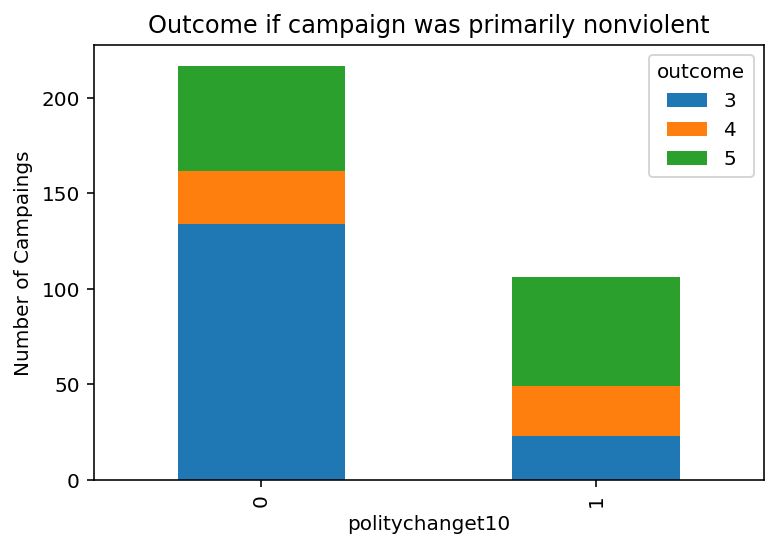

In [28]:
data.groupby([var_name,'outcome']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Outcome if campaign was primarily nonviolent')
plt.ylabel('Number of Campaings')
plt.xlabel('politychanget10')
plt.show()